In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pystable

# Get Data

Jan to Jun '21

In [2]:
df = pd.read_csv('../../csv/NFTX-WETH-10mTWAP-20210115-20210630.csv', index_col=0)

In [3]:
df.head()

,logIndex,transactionHash,blockNumber,reserve0,reserve1,timestamp,close,twap
0,202,b'\xcbj8\x1d\x16e\x15\xf6\xec.v8\xd2\xffK\\\xe...,11668073,52636877955673771262467,1160261500388651657718,2021-01-16 19:18:12,0.022043,0.022043
1,4,b'\xfc\xb7\xba\xecn\x96x\xbd\xe1\xb9\xa4\x00\x...,11668074,52520919253830835548221,1162830900564392957430,2021-01-16 19:18:54,0.022140,0.022092
2,14,b'\x9b\xadI3\x00`\x08\xcf\xfa\xf3_.\xd5\x16\xc...,11668076,52629388900083303773487,1160441470608309637271,2021-01-16 19:19:17,0.022049,0.022077
3,172,b'\x16\x80S\xbf\xad\xd6\xea\xa5\x04\xe2\xd6;\x...,11668093,52567748973058334416587,1161806276278177035534,2021-01-16 19:22:55,0.022101,0.022083
4,238,b'\x8e\xbf\xad\xc5@rw\xde\xc7\xc1\xa3ii:C\xd4\...,11668402,51943694768512702615853,1175806276278177035534,2021-01-16 20:28:27,0.022636,0.022636


In [4]:
df.tail()

,logIndex,transactionHash,blockNumber,reserve0,reserve1,timestamp,close,twap
15255,180,"b'I\xa89\x17\xae\x8e&,\x98\xf1\xb4\x8f\x1a\xa3...",12732015,56051940044100108288302,1522218059517640499247,2021-06-29 23:53:17,0.027157,0.026922
15256,201,b'P\xfdI.\x91\xe6\x0e\x98\xa3BS\x141\xa3\xea\x...,12732024,56043940044100108288302,1522436002574988840325,2021-06-29 23:55:05,0.027165,0.027014
15257,14,"b""\xfb%\x18\xaa\xca\x14\xfaH\xb1\xd9\x90\xd1\x...",12732027,56074033473663663157930,1521621401852783146112,2021-06-29 23:55:29,0.027136,0.027038
15258,52,"b""}E\\i\x18\xa0\xeem\x90\t\x1dl\xe9\x133\xd8\x...",12732041,56059033473663663157930,1522029774930400162543,2021-06-29 23:57:01,0.027150,0.027152
15259,14,b'\xd20\xfb\xb9T\xb5\xca\x99\xba\x1f\xaf\xbf\n...,12732044,56076465271079654953996,1521558059316976891683,2021-06-29 23:57:41,0.027134,0.027148


<AxesSubplot:>

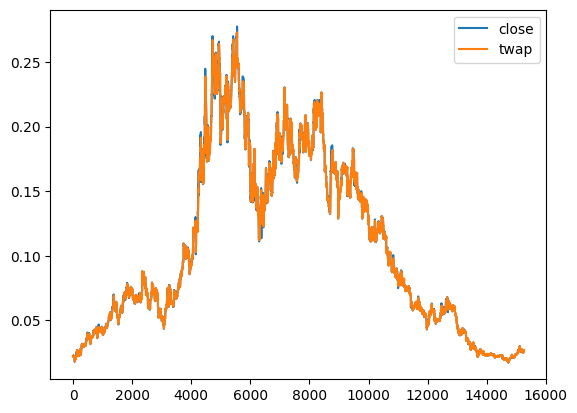

In [11]:
df[['close', 'twap']].plot()

<AxesSubplot:>

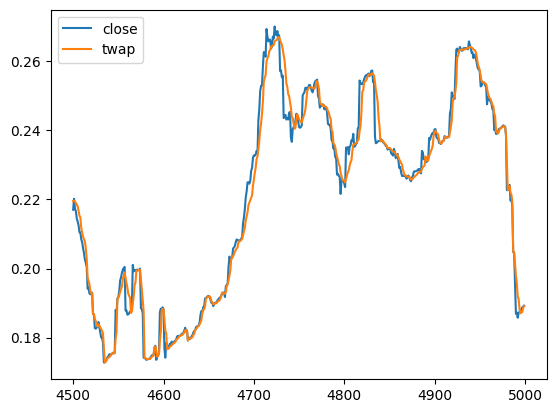

In [10]:
df[['close', 'twap']].iloc[4500:5000,:].plot()

Jan '21 to May '22

In [12]:
df2 = pd.read_csv('../../csv/NFTX-WETH-10mTWAP-20210115-20220504.csv', index_col=0)

<AxesSubplot:>

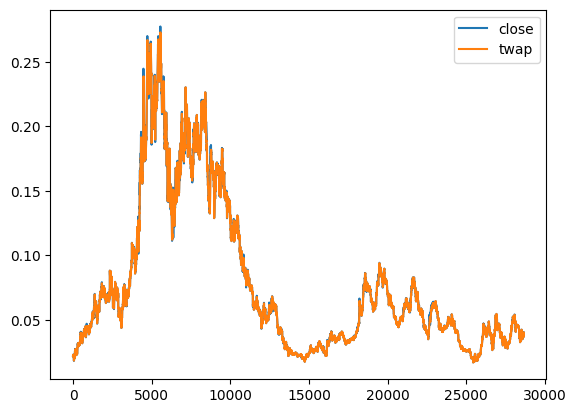

In [13]:
df2[['close', 'twap']].plot()

In [ ]:
# Check pystable parameters
def gaussian():
    return pystable.create(alpha=2.0, beta=0.0, mu=0.0,
                           sigma=1.0, parameterization=1)
# Check distribution params of benchmark dataset

p = pd.read_csv('../csv/data-1625069716_weth-usdc-twap.csv')['twap'].to_numpy()
log_close = [np.log(p[i]/p[i-1]) for i in range(1, len(p))]

dst_bench = gaussian()  # use gaussian as init dist to fit from
pystable.fit(dst_bench, log_close, len(log_close))
print(
    f'''
    fit params: alpha: {dst_bench.contents.alpha}, beta: {dst_bench.contents.beta},
    mu: {dst_bench.contents.mu_1}, sigma: {dst_bench.contents.sigma}
    '''
)
# First and last date of benchmark dataset.
# Later check the distribution params of twap_base for this date range

benchmark = pd.read_csv('../csv/data-1625069716_weth-usdc-twap.csv')
print('fist date:', benchmark.iloc[0, 1])
print('last date:', benchmark.iloc[len(benchmark)-1, 1])
# Distribution params of twap_base

p = twap_base.twap.to_numpy()
log_close = [np.log(p[i]/p[i-1]) for i in range(1, len(p))]

dst = gaussian()  # use gaussian as init dist to fit from
pystable.fit(dst, log_close, len(log_close))
print(
    f'''
    fit params: alpha: {dst.contents.alpha}, beta: {dst.contents.beta},
    mu: {dst.contents.mu_1}, sigma: {dst.contents.sigma}
    '''
)
# Distribution params of twap_base between april 18 '21 and june 30 '21

p = twap_base[(twap_base['time'] >= '2021-04-18 20:50:00')
            & (twap_base['time'] <= '2021-06-30 16:09:00')]['twap'].to_numpy()
log_close = [np.log(p[i]/p[i-1]) for i in range(1, len(p))]

dst_comp = gaussian()  # use gaussian as init dist to fit from
pystable.fit(dst_comp, log_close, len(log_close))
print(
    f'''
    fit params: alpha: {dst_comp.contents.alpha}, beta: {dst_comp.contents.beta},
    mu: {dst_comp.contents.mu_1}, sigma: {dst_comp.contents.sigma}
    '''
)
Parameters for all 3 datasets are different. Surprising that they are different for benchmark and comparison data too since they're both ETHUSD twaps over the same dates.

Compare benchmark and comparison TWAPs:
comp_p = list(twap_base[(twap_base['time'] >= '2021-04-18 20:50:00')
            & (twap_base['time'] <= '2021-06-30 16:09:00')]['twap'])

bench_p = list(pd.read_csv('../csv/data-1625069716_weth-usdc-twap.csv')['twap'])

plt.figure(figsize=(25,10))
plt.plot([i for i in range(len(comp_p))], comp_p, label='Comp')
plt.plot([i for i in range(len(bench_p))], [i/1000000 for i in bench_p], label='Bench')
plt.legend(loc='upper left')
plt.show()

# There's significant difference in these TWAPs
# And benchmark dataset has some garbage spikes
[i for i in bench_p if i > 5000000000]
# Also benchmark df doesn't even have an accurate 10 min TWAP
bench_df = pd.read_csv('../csv/data-1625069716_weth-usdc-twap.csv')
bench_df['time_diff'] = bench_df.timestamp - bench_df.timestamp.shift(1)
bench_df['time_diff'].mean()
So, benchmark doesn't look like a reliable dataset. Which is expected because it was pulled from Sushi's ETH USD pool at a time when uniswap v3's more liquid pool existed.
Now, let's see if there are similarities in CDF plots
l = [i/100 for i in range(1, 100, 1)]
p_bench = pystable.q(dst_bench, l, len(l))
p = pystable.q(dst, l, len(l))
p_comp = pystable.q(dst_comp, l, len(l))
plt.figure(figsize=(25,10))
plt.plot(p_bench, l, label='Benchmark')
plt.plot(p, l, label='All data')
plt.plot(p_comp, l, label='Comparison')
plt.legend(loc='upper left')
plt.show()
